# Explore Library Usage

This is an exploratory Analysis with the goal of understanding the data more in-depth.

Assumptions: 
- There are no incorrect values

In [130]:
#import and read in data

import pandas as pd 
import numpy as np
import seaborn as sb
from matplotlib import rcParams
import matplotlib.pyplot as plt

%matplotlib inline
sb.set_style('whitegrid')
fig = plt.figure()

data = pd.read_csv('C:/Users/Scott/Desktop/Data/Library_Usage.csv')


#Briefly look at data
data.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


- Patron Type Code-----------------Nominal
- Patron Type Definition-----------Nominal
- Total Checkouts------------------Numeric
- Total Renewals-------------------Numeric
- Age Range------------------------Nominal
- Home Library Code----------------Nominal
- Home Library Definition----------Nominal
- Circulation Active Month---------Nominal
- Circulation Active Year----------Nominal
- Notice Preference Code-----------Nominal
- Notice Preference Definition-----Nominal
- Provided Email Address-----------Binary
- Year Patron Registered-----------Numeric
- Outside of County----------------Binary
- Supervisor District--------------(empty)

# Clean

### Duplicates Columns
- Patron Type Code & Patron Type Definition
- Home Library Code & Home Library Definition
- Notice Preference Code & Notice Preference Definition

In [131]:
df = data
df = df.drop('Patron Type Code',1)
df = df.drop('Home Library Code',1)
df = df.drop('Notice Preference Code',1)

### Remove Nulls

In [132]:
print(df.isnull().sum())
df = df.drop('Supervisor District',1)
df = df.dropna(axis=0)

Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64


# Explore

#### Table of Contents
1. View 2 continuous variables
2. View all categorical variables
3. Segment data by "Total Checkouts" & "Total Renewals"
    - Graphs of each attribute
    - Correlation Matrix
4. Segment data by "Library Location"
    - Corrleation Matrix
5. Conclusion

## View 2 continuous variables

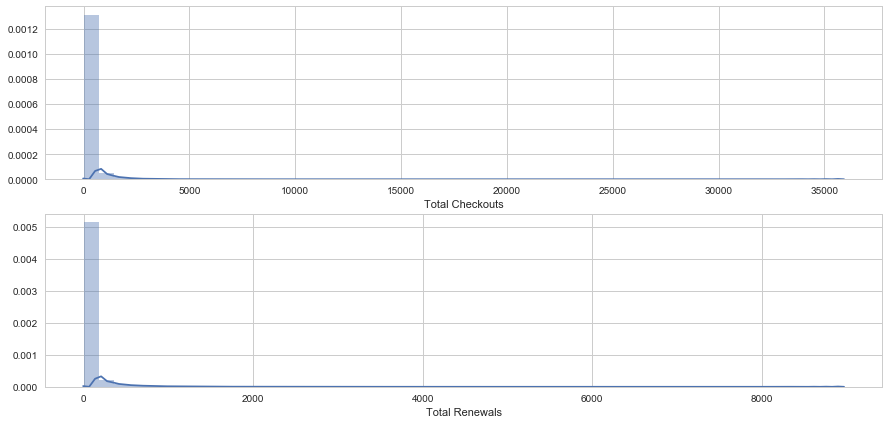

In [133]:
from matplotlib.gridspec import GridSpec
the_grid = GridSpec(2, 1)
plt.figure(figsize=(15,7))

plt.subplot(the_grid[0,0])
sb.distplot(df['Total Checkouts'])
plt.subplot(the_grid[1,0])
sb.distplot(df['Total Renewals'])

We now the data here is really skewed for both continuous variables. Let's normal it by taking the log of them.

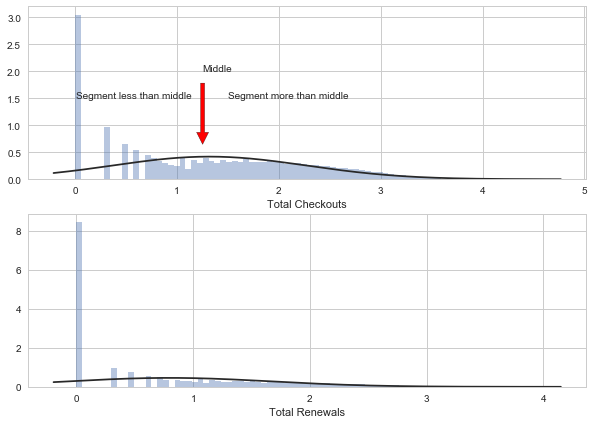

In [134]:
from scipy.stats import norm

plt.figure(figsize=(10,7))
the_grid = GridSpec(2, 1)

x = np.log10(df['Total Checkouts']+1)
y = np.log10(df['Total Renewals']+1)

plt.subplot(the_grid[0,0])
ax = sb.distplot(x,bins=80,fit=norm,kde=False)
ax.annotate('Middle', xy=(1.25,.5), xytext=(1.25,2),
            arrowprops=dict(facecolor='red', shrink=.1))
ax.annotate('Segment less than middle',xy=(.4,1.5),xytext=(.01,1.5))
ax.annotate('Segment more than middle',xy=(1.5,1.5),xytext=(1.5,1.5))
plt.subplot(the_grid[1,0])
sb.distplot(y,bins=80,fit=norm,kde=False)

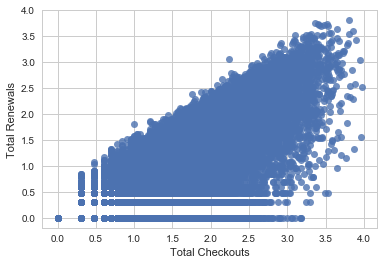

In [135]:
#Since there are 420k records lets take a small sample of the total population...let's say 5%
df_sample = df.sample(frac=.05)
x = np.log10(df_sample['Total Checkouts']+1)
y = np.log10(df_sample['Total Renewals']+1)
sb.regplot(x,y, fit_reg=False)

- After viewing the histogram spreads we see that the guissian distribution (visualized as the line) estimates the middle of the data to fall just after the xtick "1" which is the log of 10. This tells us: at the general level there for 2 segments. Patrons above ~10 checkouts and renewals, and patrons below. 
- Scatter plot, we see that there is some type of linear relationship between renewals and checkouts. We can look more in depth at this linear relationship when slicing the data. In addition to the linear relationship we see categorical-like distribution. Thankfully we don't need to worry about it because this is caused from the log function. 

# View all Categorical Variables

### Let's look at all the defining attributes of the population's library activity 
1. Patron Type
2. Age Range
3. Library Location
4. Last Active Year
5. Preferred Notification medium

As we look at these attributes, I will slice up the activity volume to:

1. Low Checkouts & Low Renewals
2. High Checkouts & High Renewals
3. Low Checkouts & High Renewals
4. High Checkouts & Low Renewals 

This will hopefully help me see if there are any differentiating signs from the 4 slices.

    - High Activities will be > median
    - Low Activities will be < median
    - Low Checkouts & High Renewals
    - High Checkouts & Low Renewals    
    
*WARNING* to save space I did NOT keep all the graphs at the same limits. Please be aware of the axis increments! ***

## Segmenting by Activity levels

In [136]:
# Finding Mean and 90% numbers
# Slicing DF accordingly
med = np.median(df['Total Checkouts'])
mid = np.median(df['Total Renewals'])

low_df_slice = df.loc[df['Total Checkouts'] <= med]
low_df_slice = low_df_slice.loc[low_df_slice['Total Renewals'] <= mid]

high_df_slice = df.loc[df['Total Checkouts'] > med]
high_df_slice = high_df_slice.loc[high_df_slice['Total Renewals'] > mid]

low_high_df_slice = df.loc[df['Total Checkouts'] <= med]
low_high_df_slice = low_high_df_slice.loc[low_high_df_slice['Total Renewals'] > mid]

high_low_df_slice = df.loc[df['Total Checkouts'] > med]
high_low_df_slice = high_low_df_slice.loc[high_low_df_slice['Total Renewals'] <= mid]

#### Patron Type

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


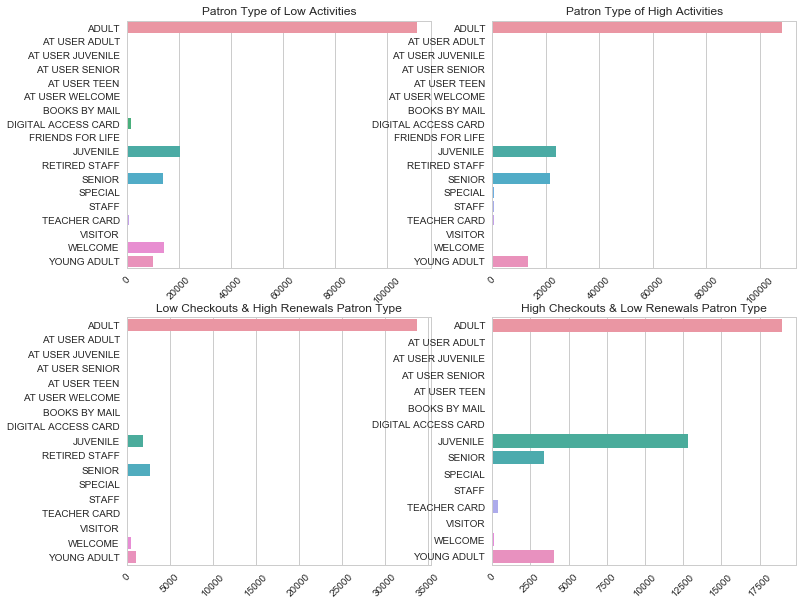

In [137]:
the_grid = GridSpec(2, 2)
plt.figure(figsize=(12,10))

# Low Activity Patron Type
plt.subplot(the_grid[0,0])
grouping = low_df_slice.groupby('Patron Type Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Patron Type of Low Activities')
plt.xticks(rotation= 45)

# High Activity Patron Type
plt.subplot(the_grid[0,1])
grouping = high_df_slice.groupby('Patron Type Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Patron Type of High Activities')
plt.xticks(rotation= 45)


# Low Checkouts & High Renewals Patron Type
plt.subplot(the_grid[1,0])
grouping = low_high_df_slice.groupby('Patron Type Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Low Checkouts & High Renewals Patron Type')
plt.xticks(rotation= 45)

# High Checkouts & Low Renewals Patron Type
plt.subplot(the_grid[1,1])
grouping = high_low_df_slice.groupby('Patron Type Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('High Checkouts & Low Renewals Patron Type')
plt.xticks(rotation= 45)

plt.show()

        These graph show very little change between the different slices. In fact this attribute may be worth throwing away because of its inconsistent categories.

#### Age Range

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


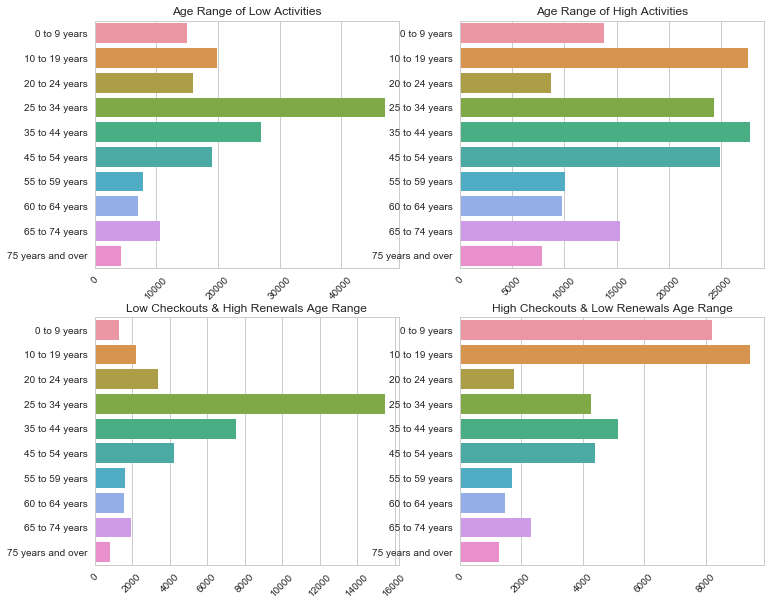

In [138]:
# All activity Age Range

plt.figure(figsize=(12,10))

# Low Activity Age Range
plt.subplot(the_grid[0,0])
grouping = low_df_slice.groupby('Age Range')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Age Range of Low Activities')
plt.xticks(rotation= 45)


# High Activity Age Range
plt.subplot(the_grid[0,1])
grouping = high_df_slice.groupby('Age Range')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Age Range of High Activities')
plt.xticks(rotation= 45)

# Low Checkouts & High Renewals Age Range
plt.subplot(the_grid[1,0])
grouping = low_high_df_slice.groupby('Age Range')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Low Checkouts & High Renewals Age Range')
plt.xticks(rotation= 45)

# High Checkouts & Low Renewals Patron Type
plt.subplot(the_grid[1,1])
grouping = high_low_df_slice.groupby('Age Range')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('High Checkouts & Low Renewals Age Range')
plt.xticks(rotation= 45)

plt.show()

These graphs show more promise. Age could very well be the best classifier for cohorts. Additionally, it seems there may be some trends with age groups and their amount of activity. 
- Interestingly the "All Activities" graph shows a relatively normal distrubition of age groups. While for a categorical attribute this is very strange, it makes more sense when realizing it is a groupig of conitunuous data. This insight unfortunately is important for solely data purposes, and not for a real world problem.
- One real world insight is that for High Checkouts & Low Renewals graph shows a super high numbers of 10-19 year olds while the Low Checkouts & High Renewals graph shows high numbers of 25-44 year olds. There might be something to hone in on regarding this.

#### Last Active Year

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


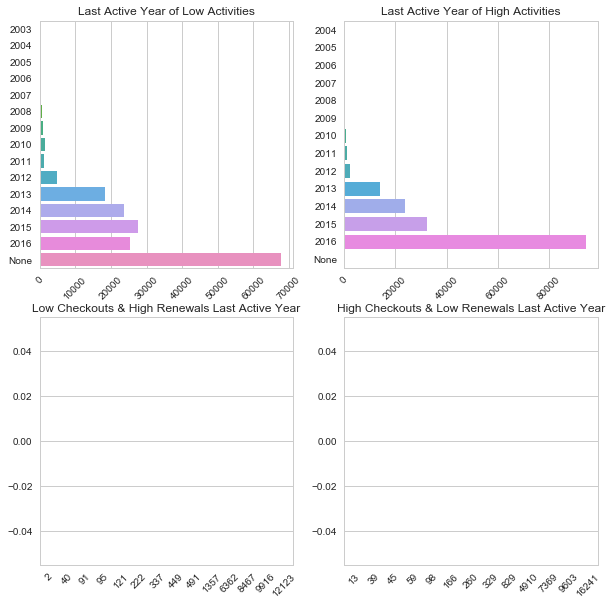

In [139]:
plt.figure(figsize=(10,10))

# Low Activity Last Active Year
plt.subplot(the_grid[0,0])
grouping = low_df_slice.groupby('Circulation Active Year')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Last Active Year of Low Activities')
plt.xticks(rotation= 45)

# High Activity Last Active Year
plt.subplot(the_grid[0,1])
grouping = high_df_slice.groupby('Circulation Active Year')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Last Active Year of High Activities')
plt.xticks(rotation= 45)

# Low Checkouts & High Renewals Last Active Year
plt.subplot(the_grid[1,0])
grouping = low_high_df_slice.groupby('Circulation Active Year')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Low Checkouts & High Renewals Last Active Year')
plt.xticks(rotation= 45)

# High Checkouts & Low Renewals Last Active Year
plt.subplot(the_grid[1,1])
grouping = high_low_df_slice.groupby('Circulation Active Year')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('High Checkouts & Low Renewals Last Active Year')
plt.xticks(rotation= 45)

plt.show()

    Low Active as a considerable variation in last uses. This makes sense because people that have only gone to the library a hand full of times would be considered low active. While people with high or oulying active rates would need to be still going to the library to get such high activity rates.

#### Last Active Month

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


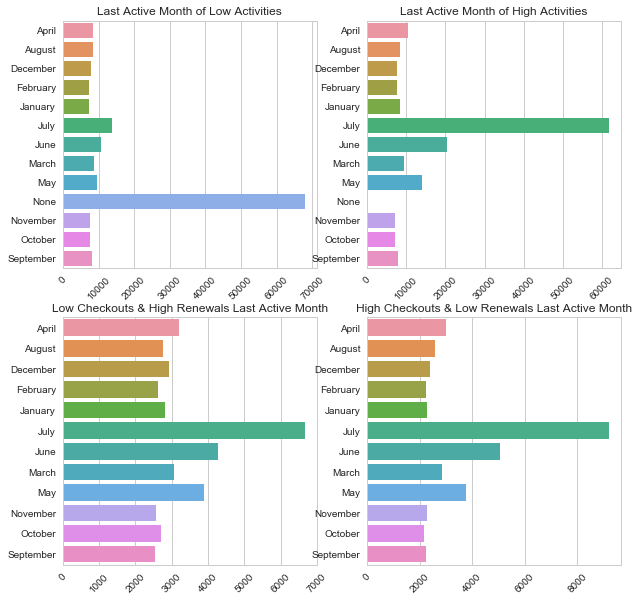

In [140]:
plt.figure(figsize=(10,10))

# Low Activity Last Active Month
plt.subplot(the_grid[0,0])
grouping = low_df_slice.groupby('Circulation Active Month')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Last Active Month of Low Activities')
plt.xticks(rotation= 45)

# High Activity Last Active Month
plt.subplot(the_grid[0,1])
grouping = high_df_slice.groupby('Circulation Active Month')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Last Active Month of High Activities')
plt.xticks(rotation= 45)

# Low Checkouts & High Renewals Last Active Month
plt.subplot(the_grid[1,0])
grouping = low_high_df_slice.groupby('Circulation Active Month')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('Low Checkouts & High Renewals Last Active Month')
plt.xticks(rotation= 45)

# High Checkouts & Low Renewals Last Active Month
plt.subplot(the_grid[1,1])
grouping = high_low_df_slice.groupby('Circulation Active Month')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.ylabel('')
plt.xlabel('')
plt.title('High Checkouts & Low Renewals Last Active Month')
plt.xticks(rotation= 45)

plt.show()

#### Library Location

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


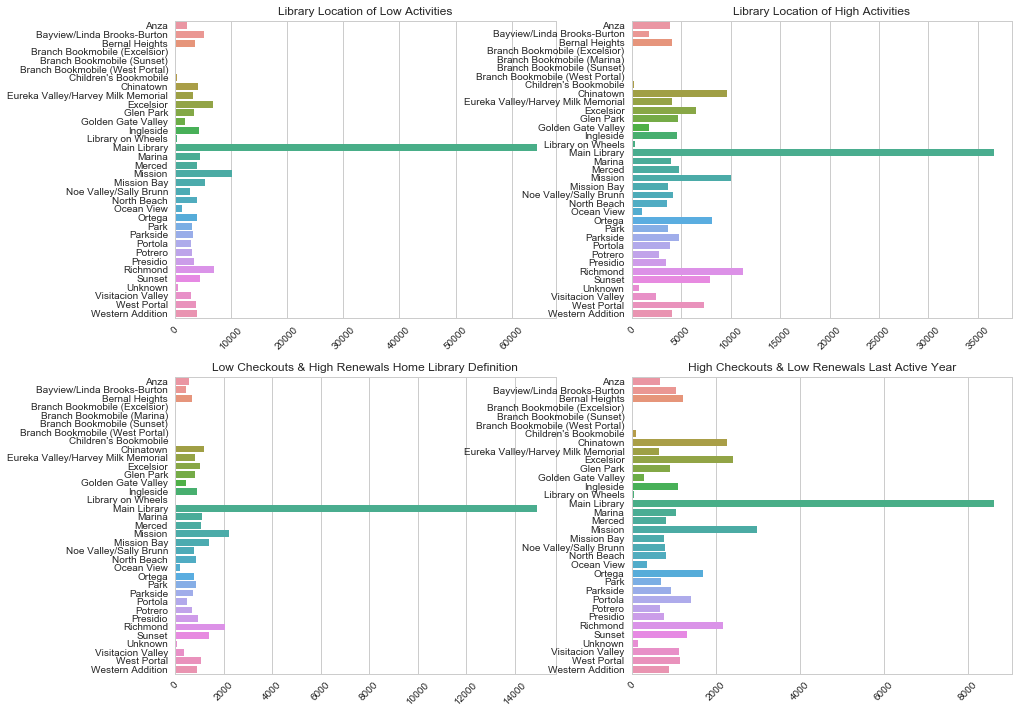

In [141]:
plt.figure(figsize=(15,12))

# Low Activity Home Library Definition
plt.subplot(the_grid[0,0])
grouping = low_df_slice.groupby('Home Library Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.xlabel('')
plt.ylabel('')
plt.title('Library Location of Low Activities')
plt.xticks(rotation= 45)


# High Activity Home Library Definition
plt.subplot(the_grid[0,1])
grouping = high_df_slice.groupby('Home Library Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.xlabel('')
plt.ylabel('')
plt.title('Library Location of High Activities')
plt.xticks(rotation= 45)

# Low Checkouts & High Renewals Home Library Definition
plt.subplot(the_grid[1,0])
grouping = low_high_df_slice.groupby('Home Library Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.xlabel('')
plt.ylabel('')
plt.title('Low Checkouts & High Renewals Home Library Definition')
plt.xticks(rotation= 45)

# High Checkouts & Low Renewals Home Library Definition
plt.subplot(the_grid[1,1])
grouping = high_low_df_slice.groupby('Home Library Definition')
num = grouping['Outside of County'].count()
ax = sb.barplot(x=num,y=num.index)
plt.xlabel('')
plt.ylabel('')
plt.title('High Checkouts & Low Renewals Last Active Year')
plt.xticks(rotation= 45)

plt.show()

    Library location doesn't look very interesting in this brief glance. However this may be a good category to filter by. Patrons who use the main library and patrons who do not. 

#### Preferred Notification Medium

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


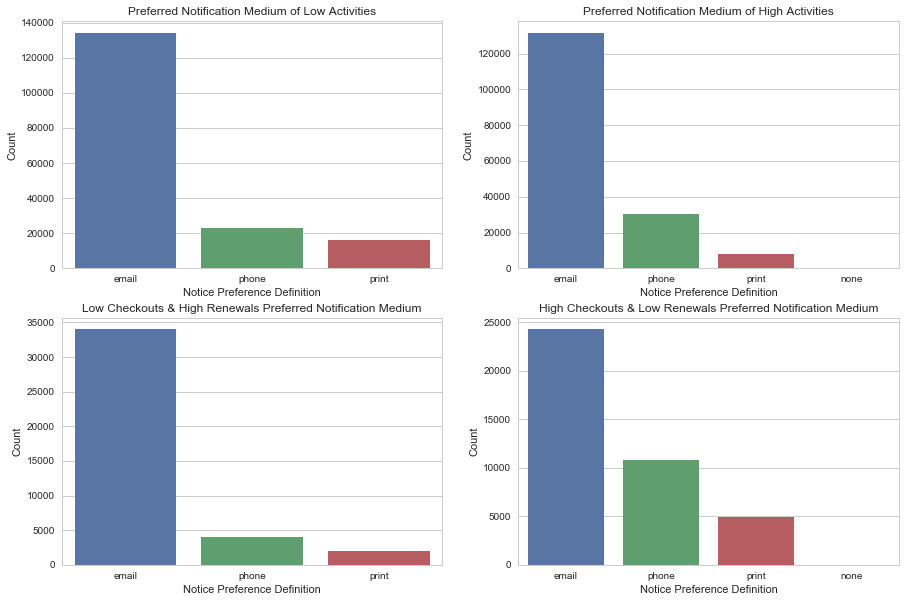

In [142]:
plt.figure(figsize=(15,10))

# Low Activity Preferred Notification Medium
plt.subplot(the_grid[0,0])
grouping = low_df_slice.groupby('Notice Preference Definition')
num = grouping['Outside of County'].count().sort_values(ascending=False)
ax = sb.barplot(x=num.index,y=num)
plt.ylabel('Count')
plt.title('Preferred Notification Medium of Low Activities')


# High Activity Preferred Notification Medium
plt.subplot(the_grid[0,1])
grouping = high_df_slice.groupby('Notice Preference Definition')
num = grouping['Outside of County'].count().sort_values(ascending=False)
ax = sb.barplot(x=num.index,y=num)
plt.ylabel('Count')
plt.title('Preferred Notification Medium of High Activities')

# Low Checkouts & High Renewals Preferred Notification Medium
plt.subplot(the_grid[1,0])
grouping = low_high_df_slice.groupby('Notice Preference Definition')
num = grouping['Outside of County'].count().sort_values(ascending=False)
ax = sb.barplot(x=num.index,y=num)
plt.ylabel('Count')
plt.title('Low Checkouts & High Renewals Preferred Notification Medium')

# High Checkouts & Low Renewals Preferred Notification Medium
plt.subplot(the_grid[1,1])
grouping = high_low_df_slice.groupby('Notice Preference Definition')
num = grouping['Outside of County'].count().sort_values(ascending=False)
ax = sb.barplot(x=num.index,y=num)
plt.ylabel('Count')
plt.title('High Checkouts & Low Renewals Preferred Notification Medium')

plt.show()

    These graph may be a good predictor for finding the older generations activity levels. Since most people use email for notifications, it would be a clear sign of age if someone preferred a postcard or printable activity rates. This may be true when looking at the "High Checkouts and Low Renewals" graph. It is the only graph with a 2:1 ratio of email to phone preference.

### Correlation Matrix for each slice
Now that we see how the attributes are distrubuted for each slice, it's time to dive in. Correlation matrices are great for understanding underlying relationships that cannot be seen from the histograms.

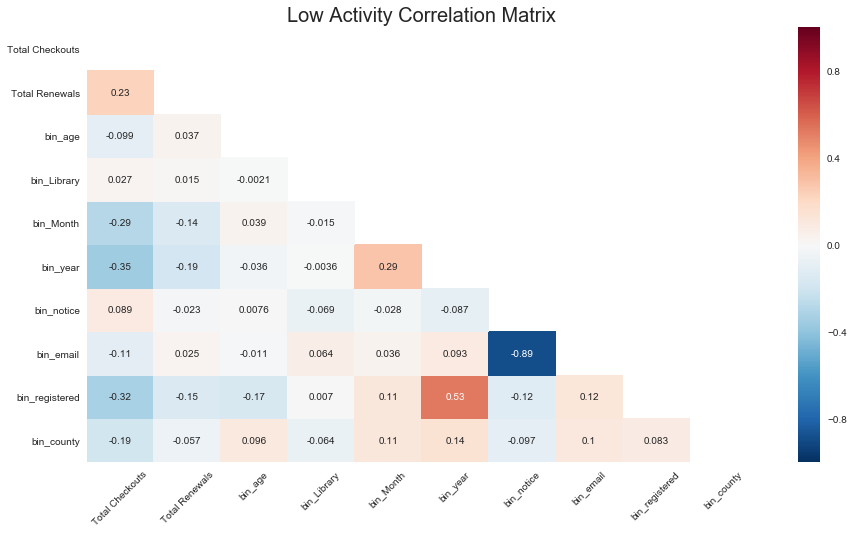

In [143]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(15,8))
num = LabelEncoder()

meaner = low_df_slice.loc[:,('Total Checkouts','Total Renewals')]

meaner['bin_age'] = num.fit_transform(low_df_slice['Age Range'].astype('str'))
meaner['bin_Library'] = num.fit_transform(low_df_slice['Home Library Definition'].astype('str'))
meaner['bin_Month'] = num.fit_transform(low_df_slice['Circulation Active Month'].astype('str'))
meaner['bin_year'] = num.fit_transform(low_df_slice['Circulation Active Year'].astype('str'))
meaner['bin_notice'] = num.fit_transform(low_df_slice['Notice Preference Definition'].astype('str'))
meaner['bin_email'] = num.fit_transform(low_df_slice['Provided Email Address'].astype('str'))
meaner['bin_registered'] = num.fit_transform(low_df_slice['Year Patron Registered'].astype('str'))
meaner['bin_county'] = num.fit_transform(low_df_slice['Outside of County'].astype('str'))

corr = meaner.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr,mask=mask,annot=True)
plt.xticks(rotation= 45)
plt.title('Low Activity Correlation Matrix',fontsize=20)

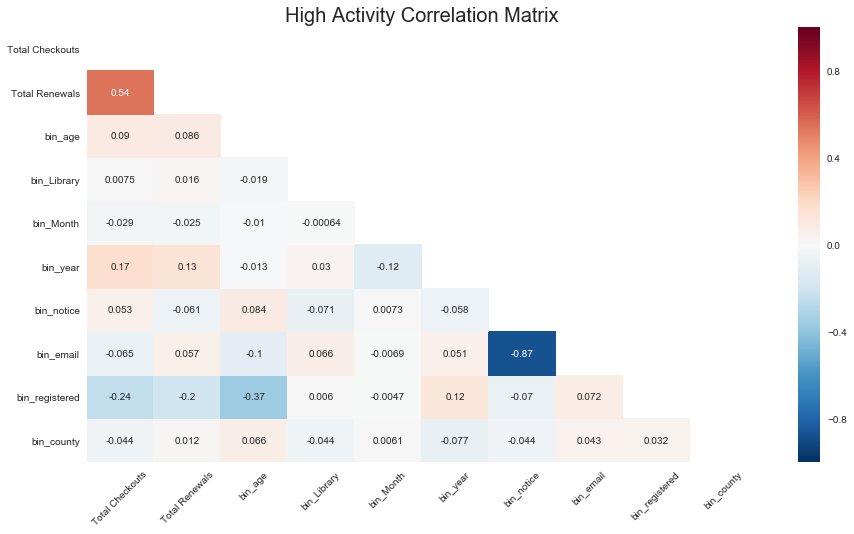

In [144]:
plt.figure(figsize=(15,8))

meaner = high_df_slice.loc[:,('Total Checkouts','Total Renewals')]

meaner['bin_age'] = num.fit_transform(high_df_slice['Age Range'].astype('str'))
meaner['bin_Library'] = num.fit_transform(high_df_slice['Home Library Definition'].astype('str'))
meaner['bin_Month'] = num.fit_transform(high_df_slice['Circulation Active Month'].astype('str'))
meaner['bin_year'] = num.fit_transform(high_df_slice['Circulation Active Year'].astype('str'))
meaner['bin_notice'] = num.fit_transform(high_df_slice['Notice Preference Definition'].astype('str'))
meaner['bin_email'] = num.fit_transform(high_df_slice['Provided Email Address'].astype('str'))
meaner['bin_registered'] = num.fit_transform(high_df_slice['Year Patron Registered'].astype('str'))
meaner['bin_county'] = num.fit_transform(high_df_slice['Outside of County'].astype('str'))

corr = meaner.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr,mask=mask,annot=True)
plt.xticks(rotation= 45)
plt.title('High Activity Correlation Matrix',fontsize=20)

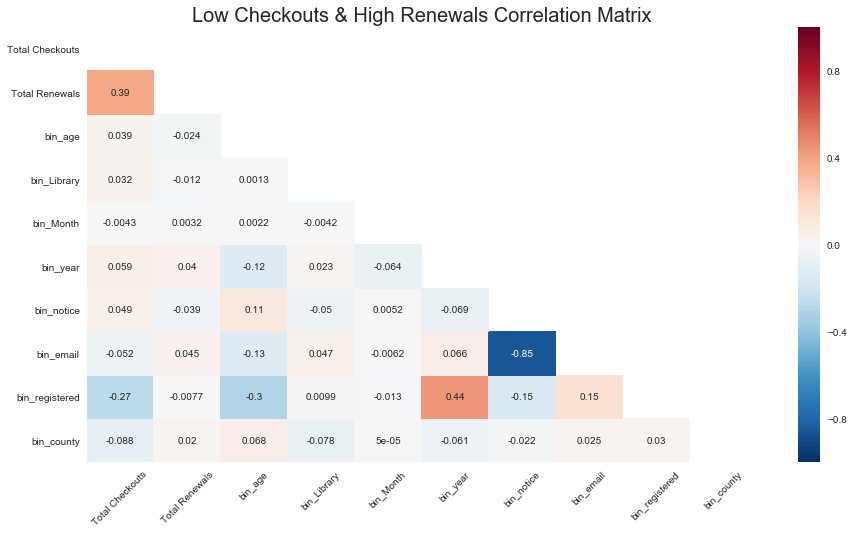

In [145]:
plt.figure(figsize=(15,8))

meaner = low_high_df_slice.loc[:,('Total Checkouts','Total Renewals')]

meaner['bin_age'] = num.fit_transform(low_high_df_slice['Age Range'].astype('str'))
meaner['bin_Library'] = num.fit_transform(low_high_df_slice['Home Library Definition'].astype('str'))
meaner['bin_Month'] = num.fit_transform(low_high_df_slice['Circulation Active Month'].astype('str'))
meaner['bin_year'] = num.fit_transform(low_high_df_slice['Circulation Active Year'].astype('str'))
meaner['bin_notice'] = num.fit_transform(low_high_df_slice['Notice Preference Definition'].astype('str'))
meaner['bin_email'] = num.fit_transform(low_high_df_slice['Provided Email Address'].astype('str'))
meaner['bin_registered'] = num.fit_transform(low_high_df_slice['Year Patron Registered'].astype('str'))
meaner['bin_county'] = num.fit_transform(low_high_df_slice['Outside of County'].astype('str'))

corr = meaner.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr,mask=mask,annot=True)
plt.xticks(rotation= 45)
plt.title('Low Checkouts & High Renewals Correlation Matrix',fontsize=20)

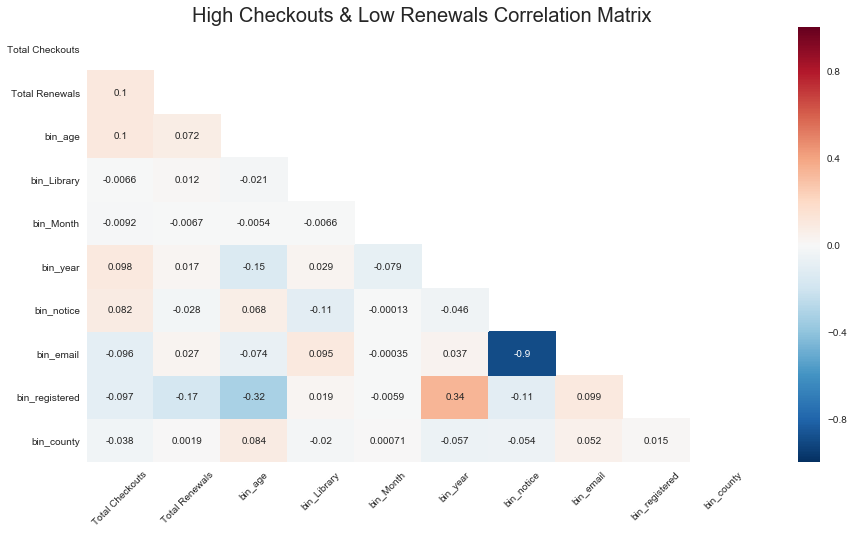

In [146]:
plt.figure(figsize=(15,8))

meaner = high_low_df_slice.loc[:,('Total Checkouts','Total Renewals')]

meaner['bin_age'] = num.fit_transform(high_low_df_slice['Age Range'].astype('str'))
meaner['bin_Library'] = num.fit_transform(high_low_df_slice['Home Library Definition'].astype('str'))
meaner['bin_Month'] = num.fit_transform(high_low_df_slice['Circulation Active Month'].astype('str'))
meaner['bin_year'] = num.fit_transform(high_low_df_slice['Circulation Active Year'].astype('str'))
meaner['bin_notice'] = num.fit_transform(high_low_df_slice['Notice Preference Definition'].astype('str'))
meaner['bin_email'] = num.fit_transform(high_low_df_slice['Provided Email Address'].astype('str'))
meaner['bin_registered'] = num.fit_transform(high_low_df_slice['Year Patron Registered'].astype('str'))
meaner['bin_county'] = num.fit_transform(high_low_df_slice['Outside of County'].astype('str'))

corr = meaner.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr,mask=mask,annot=True)
plt.xticks(rotation= 45)
plt.title('High Checkouts & Low Renewals Correlation Matrix',fontsize=20)

This slicing approach works well for the assumption that the cohorts(groups) are marketing segments. For example it helps establish which "age range" is active this year with x volume of activity. These groups can be very distinguishable with the correct data mining. Yet, Even with my light weight analysis it can be observed that there are trends. 

#### Some small immediate insights
- "Age Range" gives the most insight and should be considered the main classifier. While making a model it might be good to rememeber is it binned numeric values.
- "Patron Type" is a strange chaotic attribute and might be worth dropping.
- Slicing by "Notice Preference" and "Library Location" may be very helpful attributes as a secondary field. 

## Segmenting by Library Location 

First off we should filter patrons by whether or not they use the main library. After, we can look at the slices filtered by main library. 


In [147]:
low_df_slice_main = low_df_slice.loc[low_df_slice['Home Library Definition']=='Main Library']
low_df_slice_wo_main = low_df_slice.loc[low_df_slice['Home Library Definition']!='Main Library']

high_df_slice_main = high_df_slice.loc[high_df_slice['Home Library Definition']=='Main Library']
high_df_slice_wo_main = high_df_slice.loc[high_df_slice['Home Library Definition']!='Main Library']

low_high_df_slice_main = low_high_df_slice.loc[low_high_df_slice['Home Library Definition']=='Main Library']
low_high_df_slice_wo_main = low_high_df_slice.loc[low_high_df_slice['Home Library Definition']!='Main Library']

high_low_df_slice_main = high_low_df_slice.loc[high_low_df_slice['Home Library Definition']=='Main Library']
high_low_df_slice_main = high_low_df_slice.loc[high_low_df_slice['Home Library Definition']!='Main Library']

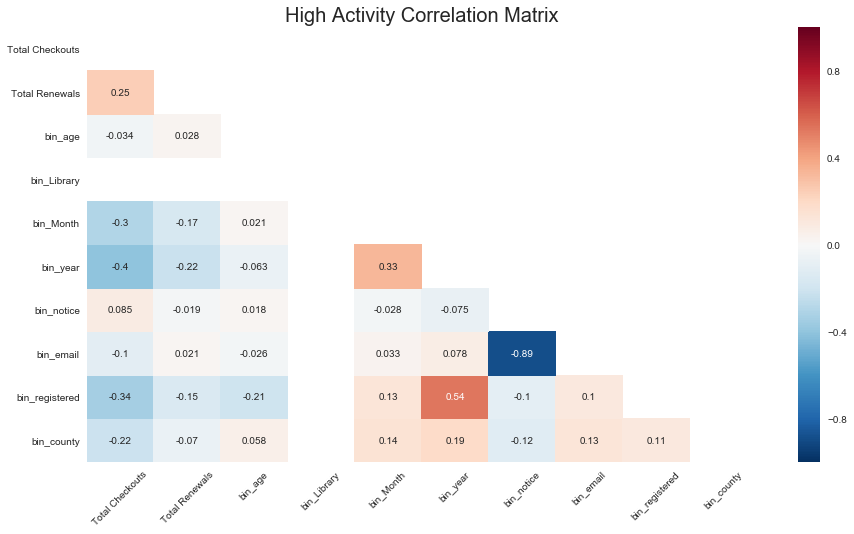

In [148]:
plt.figure(figsize=(15,8))

meaner = low_df_slice_main.loc[:,('Total Checkouts','Total Renewals')]

meaner['bin_age'] = num.fit_transform(low_df_slice_main['Age Range'].astype('str'))
meaner['bin_Library'] = num.fit_transform(low_df_slice_main['Home Library Definition'].astype('str'))
meaner['bin_Month'] = num.fit_transform(low_df_slice_main['Circulation Active Month'].astype('str'))
meaner['bin_year'] = num.fit_transform(low_df_slice_main['Circulation Active Year'].astype('str'))
meaner['bin_notice'] = num.fit_transform(low_df_slice_main['Notice Preference Definition'].astype('str'))
meaner['bin_email'] = num.fit_transform(low_df_slice_main['Provided Email Address'].astype('str'))
meaner['bin_registered'] = num.fit_transform(low_df_slice_main['Year Patron Registered'].astype('str'))
meaner['bin_county'] = num.fit_transform(low_df_slice_main['Outside of County'].astype('str'))

corr = meaner.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr,mask=mask,annot=True)
plt.xticks(rotation= 45)
plt.title('High Activity Correlation Matrix',fontsize=20)

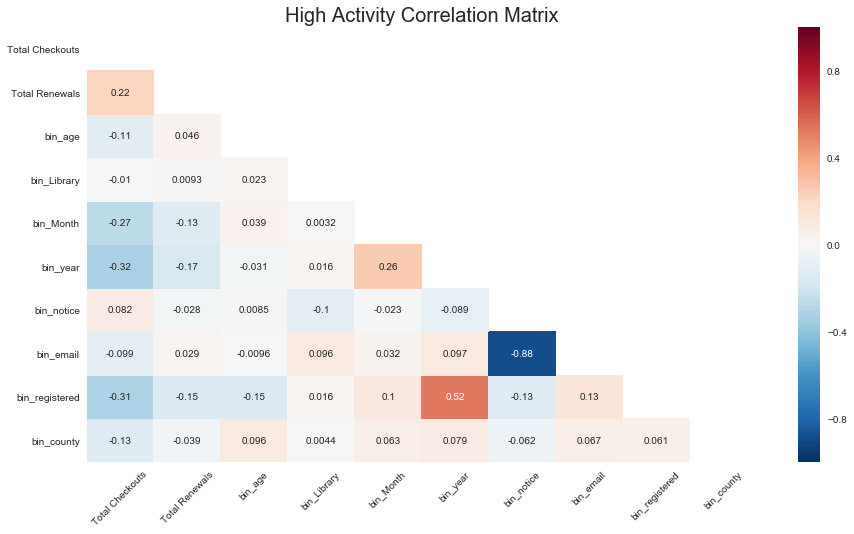

In [149]:
plt.figure(figsize=(15,8))

meaner = low_df_slice_wo_main.loc[:,('Total Checkouts','Total Renewals')]

meaner['bin_age'] = num.fit_transform(low_df_slice_wo_main['Age Range'].astype('str'))
meaner['bin_Library'] = num.fit_transform(low_df_slice_wo_main['Home Library Definition'].astype('str'))
meaner['bin_Month'] = num.fit_transform(low_df_slice_wo_main['Circulation Active Month'].astype('str'))
meaner['bin_year'] = num.fit_transform(low_df_slice_wo_main['Circulation Active Year'].astype('str'))
meaner['bin_notice'] = num.fit_transform(low_df_slice_wo_main['Notice Preference Definition'].astype('str'))
meaner['bin_email'] = num.fit_transform(low_df_slice_wo_main['Provided Email Address'].astype('str'))
meaner['bin_registered'] = num.fit_transform(low_df_slice_wo_main['Year Patron Registered'].astype('str'))
meaner['bin_county'] = num.fit_transform(low_df_slice_wo_main['Outside of County'].astype('str'))

corr = meaner.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr,mask=mask,annot=True)
plt.xticks(rotation= 45)
plt.title('High Activity Correlation Matrix',fontsize=20)

### Conclusion
- Unfortuntely, other than small differences, there isn't anything conclusive. With more time I would go deeper with the slices! Once these slices were finished, other avenues should be looked at. One way of doing this is doing a KMeans Clustering model to find hidden clustering patterns. Another option is to do a RandomForest Model which will classify cohorts by itself.